<a href="https://colab.research.google.com/github/frederikvanduuren/Mentor/blob/master/Session_5_w_Batch_Normalization_BN_after_Relu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Session 5: acc: 99,63%

## Normalizations: it learns approx 1+% faster but less incorrects
### Incorrects:  88

### Accelerate Learning of Deep Neural Networks With Batch Normalization

If the input layer is benefiting from it, why not do the same thing also for the values in the hidden layers, that are changing all the time, and get 10 times or more improvement in the training speed.





In [0]:
# https://keras.io/
#!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
# import models/layers to be able to apply Convolution2D/MaxPooling2D/Flatten

import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D, BatchNormalization
from keras.utils import np_utils

from keras.datasets import mnist
import tensorflow as tf
import seaborn as sns
from matplotlib import pyplot

In [0]:
%matplotlib inline
from sklearn.metrics import confusion_matrix

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_copy = X_train

(60000, 28, 28)


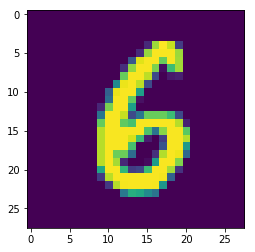

In [0]:
# training is consisting og 60k images of size 28x28 pixels
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[62])

In [0]:
# transform our dataset from having shape (n, width, height) to (n, width, height, depth=1) for tensorflow, the format is (N,H,W,C)


X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
# process the input data is to convert our data type to float32 and normalizing values between 0 and 1

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
# is new shape (60000,28,28,1)
print (X_train.shape)
# the first 10 training target values
y_train[:10]

(60000, 28, 28, 1)


array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
# 0 = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0] 1 = [0, 1, 0, 0, 0, 0, 0, 0, 0, 0] 2 = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] ... 9 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
#Y_train[:10]


In [0]:
# Test 5 finding the max number of kernels staying below 15k params
# 12k parameters
# Also accuracy of 99.6%
model = Sequential()

# output_channels * (input_channels * window_size + 1) == number_parameters
 
model.add(Convolution2D(128, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(16, 1, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1))) 
model.add(Convolution2D(16, 1, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Convolution2D(10, 5))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Activation('softmax'))
model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  if __name__ == '__main__':


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 128)       1280      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 16)        2064      
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 16)        64        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 16)        528       
_________________________________________________________________
batch_normalization_2 (Batch (None, 11, 11, 16)       

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
history = model.fit(X_train, Y_train, validation_split=0.20, batch_size=32, nb_epoch=10, verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.




Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 25s 527us/step - loss: 0.4255 - acc: 0.9307 - val_loss: 0.1386 - val_acc: 0.9833
Epoch 2/10
48000/48000 [==============================] - 26s 534us/step - loss: 0.1813 - acc: 0.9669 - val_loss: 0.0970 - val_acc: 0.9839
Epoch 3/10
48000/48000 [==============================] - 24s 493us/step - loss: 0.1283 - acc: 0.9725 - val_loss: 0.0661 - val_acc: 0.9872
Epoch 4/10
48000/48000 [==============================] - 25s 520us/step - loss: 0.1020 - acc: 0.9766 - val_loss: 0.0599 - val_acc: 0.9867
Epoch 5/10
48000/48000 [==============================] - 23s 488us/step - loss: 0.0853 - acc: 0.9804 - val_loss: 0.0566 - val_acc: 0.9883
Epoch 6/10
48000/48000 [==============================] - 25s 517us/step - loss: 0.0708 - acc: 0.9836 - val_loss: 0.0417 - val_acc: 0.9892
Epoch 7/10
48000/48000 [==============================] - 24s 491us/step - loss: 0.0637 - acc: 0.9847 - val_loss: 

In [0]:
train_score = model.evaluate(X_train, Y_train, verbose=0)
test_score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print('Train: %.3f, Test: %.3f' % (train_score[1], test_score[1]))

Train: 0.993, Test: 0.989


## plot history


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


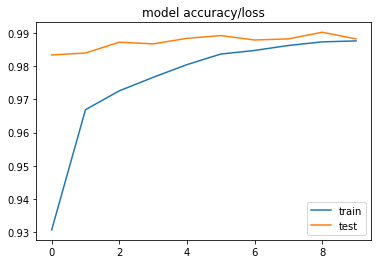

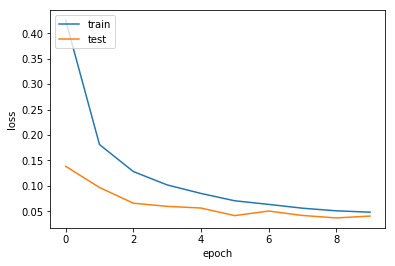

In [0]:
print(history.history.keys())
# summarize history for accuracy
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.title('model accuracy/loss')
pyplot.legend()
pyplot.show()

# summarize history for loss
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'test'], loc='upper left')
pyplot.show()

In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[5.63214098e-06 4.87844627e-05 3.26447844e-05 2.52747355e-04
  1.43652742e-05 2.80828635e-06 6.31291332e-05 9.99557555e-01
  6.99399152e-07 2.15888431e-05]
 [7.73025095e-05 3.76421594e-05 9.92613316e-01 9.76433694e-06
  6.97413179e-06 1.04935464e-06 7.19718961e-03 2.66039137e-06
  3.24179637e-05 2.16038970e-05]
 [1.50491371e-06 9.99782145e-01 3.35411596e-06 1.85996323e-05
  8.88705199e-06 7.89296755e-05 2.52616028e-05 1.15488065e-05
  5.58855681e-05 1.38001287e-05]
 [9.98209715e-01 8.94558907e-05 1.89549846e-05 3.88281769e-05
  2.27583179e-04 2.35362659e-05 1.29361113e-03 5.34969440e-05
  2.35178013e-05 2.12569194e-05]
 [4.21889199e-05 8.40243956e-05 6.12688609e-06 2.05450669e-05
  9.99765337e-01 1.57630584e-05 2.86642480e-05 3.53045289e-05
  4.89309002e-07 1.54276654e-06]
 [7.32901844e-06 9.99423623e-01 3.20171166e-05 1.84069377e-05
  3.16777405e-05 5.88334224e-05 1.19434881e-04 9.62848935e-05
  1.12026020e-04 1.00383564e-04]
 [1.70606882e-06 6.31005736e-04 3.65690008e-04 1.81528103e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])
for layers in layer_dict:
  print(layers)

conv2d_1
conv2d_2
batch_normalization_1
max_pooling2d_1
conv2d_3
conv2d_4
batch_normalization_2
max_pooling2d_2
conv2d_5
batch_normalization_3
flatten_1
activation_1


16


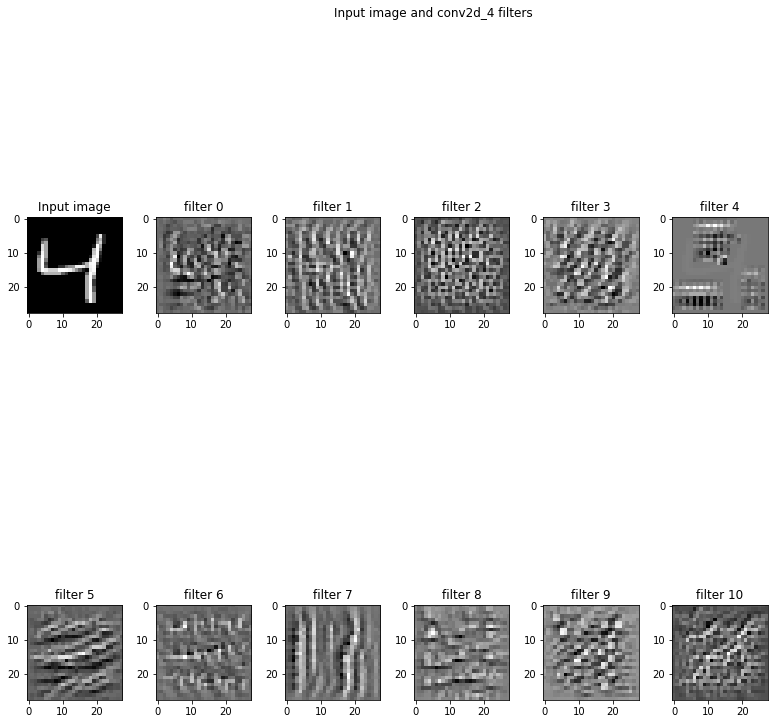

In [0]:
# code from Kaggle competition ;)

import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_4'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])
        
        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
    print(layer_output.shape[3])    
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

Simply use `model.predict_classes()` and compare the output with true labes. i.e:

(array([  87,   95,  247,  321,  358,  445,  447,  449,  646,  659,  740,
        947,  965, 1014, 1178, 1226, 1232, 1260, 1299, 1319, 1393, 1500,
       1527, 1681, 1716, 1737, 1754, 1878, 1901, 2035, 2053, 2070, 2107,
       2118, 2130, 2135, 2182, 2293, 2369, 2380, 2414, 2462, 2556, 2574,
       2654, 2720, 2742, 2758, 2896, 2927, 2939, 3030, 3060, 3062, 3073,
       3225, 3288, 3422, 3520, 3534, 3558, 3727, 3808, 3811, 3853, 3941,
       4065, 4078, 4205, 4400, 4571, 4639, 4740, 4807, 4860, 4874, 4956,
       5678, 5937, 5955, 5981, 5997, 6026, 6157, 6172, 6173, 6505, 6555,
       6571, 6576, 6597, 6625, 8081, 8092, 8095, 8408, 8520, 8522, 9009,
       9015, 9019, 9620, 9642, 9679, 9698, 9729, 9755, 9770, 9839]),)
# Incorrects:  109


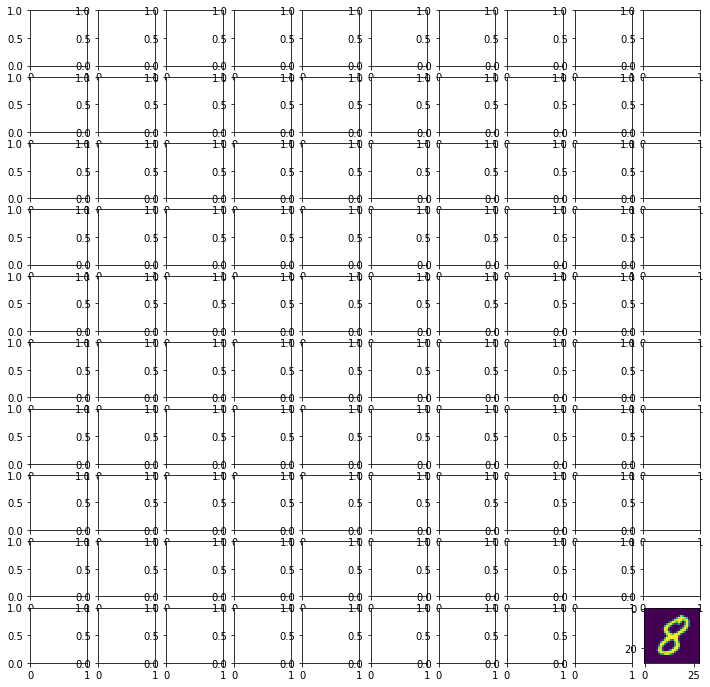

In [0]:
incorrects = np.nonzero(model.predict_classes(X_test).reshape((-1,)) != y_test)
print(incorrects)
print('# Incorrects: ' , len(incorrects[0]))
#print(incorrects[0])
pyplot.subplots(10, 10, figsize = (12, 12))
for i in range(len(incorrects[0])):
  to_plot = incorrects[0][i]
  pyplot.imshow(X_copy[to_plot])
  #print(incorrects[0][i])
pyplot.show()

(array([  87,   95,  247,  321,  358,  445,  447,  449,  646,  659,  740,
        947,  965, 1014, 1178, 1226, 1232, 1260, 1299, 1319, 1393, 1500,
       1527, 1681, 1716, 1737, 1754, 1878, 1901, 2035, 2053, 2070, 2107,
       2118, 2130, 2135, 2182, 2293, 2369, 2380, 2414, 2462, 2556, 2574,
       2654, 2720, 2742, 2758, 2896, 2927, 2939, 3030, 3060, 3062, 3073,
       3225, 3288, 3422, 3520, 3534, 3558, 3727, 3808, 3811, 3853, 3941,
       4065, 4078, 4205, 4400, 4571, 4639, 4740, 4807, 4860, 4874, 4956,
       5678, 5937, 5955, 5981, 5997, 6026, 6157, 6172, 6173, 6505, 6555,
       6571, 6576, 6597, 6625, 8081, 8092, 8095, 8408, 8520, 8522, 9009,
       9015, 9019, 9620, 9642, 9679, 9698, 9729, 9755, 9770, 9839]),)
# Incorrects:  109


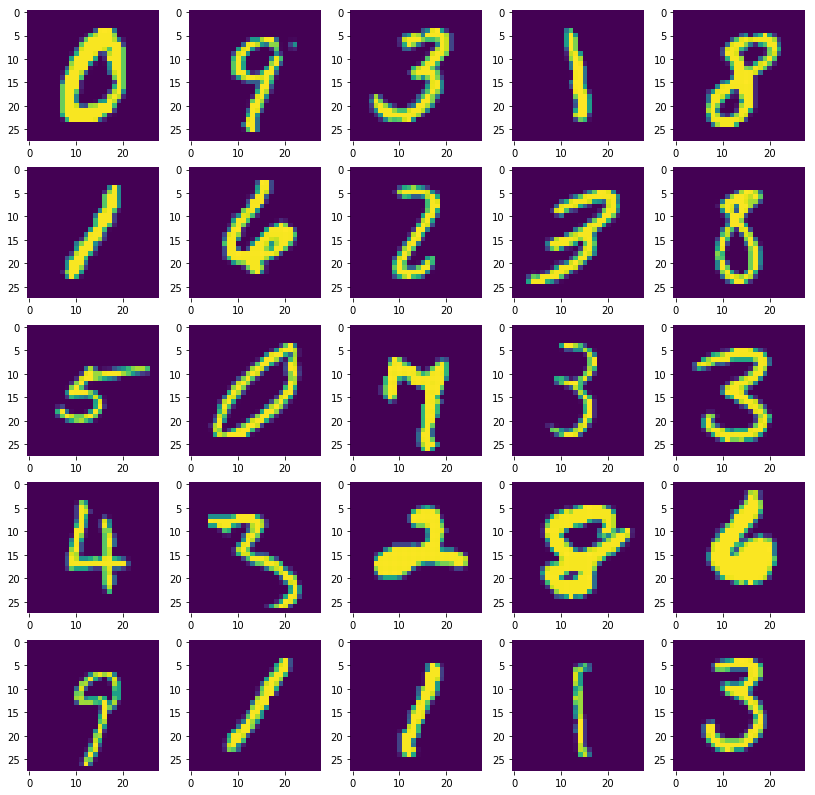

In [0]:
incorrects = np.nonzero(model.predict_classes(X_test).reshape((-1,)) != y_test)
print(incorrects)
print('# Incorrects: ' , len(incorrects[0]))

fig=pyplot.figure(figsize=(14, 14))
columns = 5
rows = 5
for i in range(1, columns*rows +1):
    #img = np.random.randint(10, size=(h,w))
    fig.add_subplot(rows, columns, i, frameon=False)
    to_plot = incorrects[0][i]
    pyplot.imshow(X_copy[to_plot])
plt.show()

# Create a Confusion Matrix
You can use Tensorflow’s confusion matrix to create a confusion matrix.

[[ 978    0    1    0    0    0    0    1    0    0]
 [   0 1132    1    1    0    1    0    0    0    0]
 [   3    1 1025    0    0    0    1    2    0    0]
 [   0    0    2 1004    0    2    0    1    1    0]
 [   1    2    0    0  967    0    3    0    2    7]
 [   2    0    1    4    0  879    2    2    0    2]
 [   8    2    0    1    1    1  945    0    0    0]
 [   0    8    5    0    0    0    0 1013    1    1]
 [   5    0    3    1    1    2    2    1  957    2]
 [   7    1    1    0    5    1    0    3    0  991]]


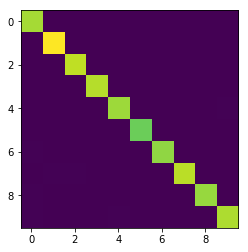

In [0]:
y_pred=model.predict_classes(X_test)
con_mat = confusion_matrix(y_test, y_pred)
print(con_mat)
pyplot.imshow(con_mat)

  Normalization Confusion Matrix to the interpretation of which class is being misclassified.

The diagonal elements represent the number of points for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by model.
Using matplotlib to plot confusion matrix and Seaborn library to create a heatmap.

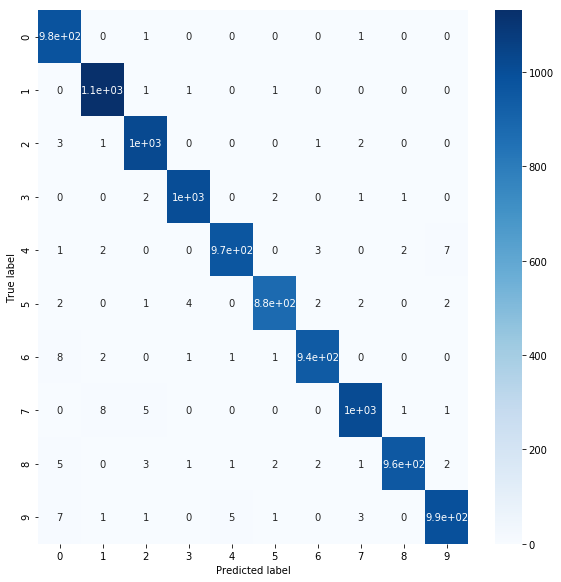

In [0]:
figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()